<p style="background-color:mediumpurple;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>CatBoost Classification</b></p>

**About Dataset**

Machine Learning Model to Predict Clicks on Ads

* **Daily Time Spent on Site**: consumer time on site in minutes
* **Age**: cutomer age in years
* **Area Income**: Avg. Income of geographical area of consumer
* **Daily Internet Usage**: Avg. minutes a day consumer is on the internet
* **Ad Topic Line**: Headline of the advertisement
* **City**: City of consumer
* **Male**: Whether or not consumer was male
* **Country**: Country of consumer
* **Timestamp**: Time at which consumer clicked on Ad or closed window
* **Clicked on Ad**: 0 or 1 indicated clicking on Ad

# <font color='mediumpurple'> <b>Importing Libraries</b><font color='black'>  

In [4]:
# !pip install catboost

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report, RocCurveDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from catboost import CatBoostClassifier, Pool

plt.rcParams["figure.figsize"] = (10,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# <font color='mediumpurple'> <b>Loading The Dataset</b><font color='black'>

In [7]:
df = pd.read_csv("advertising2.csv")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [8]:
df.sample(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
748,45.11,58,39799.73,195.69,Sharable reciprocal project,Browntown,0,Netherlands,2016-01-05 16:26:44,1
404,57.24,52,46473.14,117.35,Profound optimizing utilization,Richardsonland,1,Latvia,2016-06-29 21:39:42,1
752,70.61,28,72154.68,190.12,Assimilated encompassing portal,Meaganfort,0,Italy,2016-04-16 05:24:33,0
239,73.27,32,67113.46,234.75,Streamlined analyzing initiative,Haleview,1,Martinique,2016-01-29 20:16:54,0
812,84.25,32,63936.50,170.90,Pre-emptive client-driven secured line,New Sean,1,Angola,2016-04-10 06:32:11,0
986,76.44,28,59967.19,232.68,Synchronized human-resource moderator,Port Julie,1,Northern Mariana Islands,2016-04-06 17:26:37,0
245,81.22,53,34309.24,223.09,Networked coherent interface,Port Jason,1,San Marino,2016-01-07 13:25:21,0
715,49.19,38,61004.51,123.08,Versatile solution-oriented secured line,North Mark,0,Hungary,2016-05-12 12:11:12,1
448,51.87,50,51869.87,119.65,Team-oriented dynamic forecast,Kevinberg,0,Afghanistan,2016-03-10 22:28:52,1
313,72.19,33,61275.18,250.35,Synchronized national infrastructure,Curtisview,1,Saint Lucia,2016-05-19 11:16:59,0


# <font color='mediumpurple'> <b>Understanding Data & EDA</b><font color='black'>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [12]:
df["Clicked on Ad"].value_counts()

Clicked on Ad
0    500
1    500
Name: count, dtype: int64

In [13]:
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [14]:
cat_features = df.select_dtypes(include="object").columns
cat_features

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [15]:
unique_values(df, cat_features)

Column: Ad Topic Line
------------------------------
Unique Values (1000): ['Cloned 5thgeneration orchestration' 'Monitored national standardization'
 'Organic bottom-line service-desk'
 'Triple-buffered reciprocal time-frame' 'Robust logistical utilization'
 'Sharable client-driven software' 'Enhanced dedicated support'
 'Reactive local challenge' 'Configurable coherent function'
 'Mandatory homogeneous architecture' 'Centralized neutral neural-net'
 'Team-oriented grid-enabled Local Area Network'
 'Centralized content-based focus group'
 'Synergistic fresh-thinking array' 'Grass-roots coherent extranet'
 'Persistent demand-driven interface' 'Customizable multi-tasking website'
 'Intuitive dynamic attitude'
 'Grass-roots solution-oriented conglomeration'
 'Advanced 24/7 productivity' 'Object-based reciprocal knowledgebase'
 'Streamlined non-volatile analyzer'
 'Mandatory disintermediate utilization'
 'Future-proofed methodical protocol' 'Exclusive neutral parallelism'
 'Public-key for

In [16]:
for feature in df.columns:
    if df[feature].dtype=="object":
        print(feature, df[feature].nunique())
        
        
# The unique counts of categorical features are being identified.
# Categorical features with a high number of unique observations will be dropped.
# Tree-based models tend to assign excessive importance to features with many unique categories.
# Additionally, features with few unique observations fail to provide meaningful learning to the model.

Ad Topic Line 1000
City 969
Country 237
Timestamp 1000


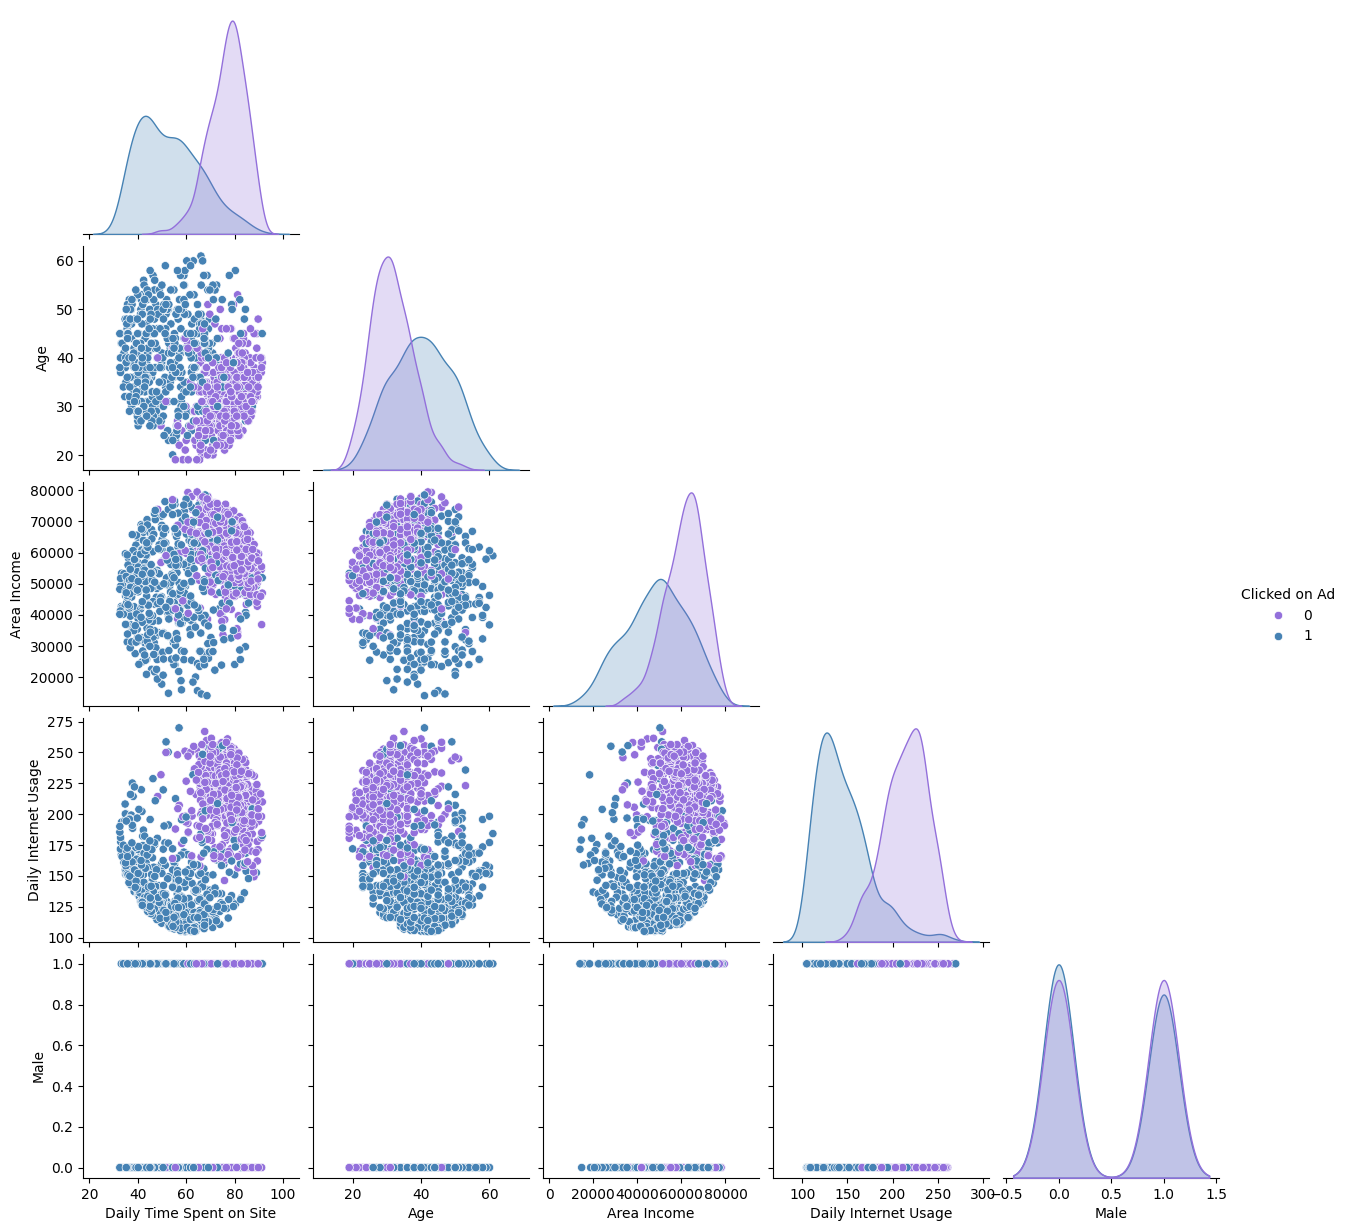

In [17]:
sns.pairplot(df, hue="Clicked on Ad", corner=True, palette=["mediumpurple", "steelblue"]);

# <font color='mediumpurple'> <b>Modeling</b><font color='black'>

## <font color='mediumorchid'> <b>Train | Test Split</b><font color='black'>

In [20]:
X = df[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"]]
y = df["Clicked on Ad"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## <font color='mediumorchid'> <b>CatBoost (Categorical Boosting) Modeling</b><font color='black'>

**CatBoost (Categorical Boosting Machine)**

**CatBoost**, developed by Yandex, is a **gradient boosting** algorithm optimized for working with **categorical data**. **CatBoost** delivers outstanding performance in both classification and regression problems and requires fewer hyperparameter adjustments compared to other boosting algorithms. It derives its name from **Categorical Boosting** and aims to overcome the limitations of other gradient boosting algorithms.

**CatBoost Features**

**1. Categorical Data Support**
CatBoost can handle categorical data directly. There is no need for manual encoding (such as one-hot or label encoding) for categorical features. It uses **target encoding** by default, minimizing the risk of overfitting.

**2. Noise Resilience**
CatBoost prevents overfitting by using a mechanism called **Ordered Boosting**. This mechanism allows the model to make accurate predictions with past data during training, enhancing its generalization capability.

**3. GPU Support**
CatBoost can run on a GPU, significantly reducing training time, especially with large datasets.

**4. High Performance with Default Parameters**
CatBoost provides high performance even with default settings, offering effective results with minimal hyperparameter adjustments.

**5. Missing Value Support**
CatBoost can work directly with missing values in datasets and requires no preprocessing for handling missing values.

**6. Interpretability**
CatBoost provides tools to enhance model interpretability. For example:
- **Feature Importance:** Shows which features are more impactful.
- **SHAP (SHapley Additive Explanations):** Used to analyze the contribution of features.

**How CatBoost Works**

Unlike other gradient boosting methods, CatBoost uses **ordered boosting**. This method increases the model’s generalization capacity by leveraging past data during training and reduces overfitting.

Additionally, CatBoost:
- Optimizes the Gradient Boosting algorithm.
- Provides better results, especially with sequential data.
- Delivers high accuracy with less training time on large datasets.

**Advantages of CatBoost**
- **Categorical Data Support:** No need for manual processing with categorical features.
- **Overfitting Control:** Ordered boosting and regularization mechanisms reduce the risk of overfitting.
- **Fast and Efficient:** It is fast, thanks to parallel processing and GPU support.
- **Interpretability:** Feature importance ranking and SHAP analysis make understanding the model's inner workings easier.
- **Missing Data Support:** Can automatically handle missing values.

**Limitations of CatBoost**
- **Slower with Small Datasets:** It may not be as fast as XGBoost or LightGBM with smaller datasets.
- **Extra Setup for GPU Usage:** GPU usage may require hardware and software compatibility.
- **Hyperparameter Optimization:** While it performs well with default parameters, hyperparameter optimization may be required for larger datasets.

**Comparison of CatBoost with Other Algorithms**

| Feature               | CatBoost                | XGBoost             | LightGBM           |
|-----------------------|-------------------------|---------------------|--------------------|
| **Categorical Data**   | Built-in support (automatic encoding) | Manual encoding required | Manual encoding required |
| **Overfitting Control** | Ordered Boosting        | L1 and L2 Regularization | Leaf-wise growth   |
| **Speed**              | Medium                  | Fast (better with GPU) | Very fast          |
| **GPU Support**        | Yes                     | Yes                 | Yes                |
| **Missing Data**       | Automatic support       | Manual handling required | Manual handling required |

**Conclusion**
**CatBoost** is a powerful gradient boosting algorithm that provides high accuracy and efficiency, especially for medium and large datasets containing categorical data. CatBoost offers distinct advantages over other algorithms when categorical data is prominent, and it delivers effective results even with default settings.

**Note:**
It will be helpful to refer to the official documentation to understand and apply all of CatBoost's parameters:  
[Documentation Link](https://catboost.ai/en/docs/)

**GBM = Decision Tree + Boosting + Gradient Descent*  
**CatBoost = GBM + Ordered Boosting + Categorical Encoding**


---

**Ordered Boosting** is one of the key innovations of the **CatBoost** algorithm and was developed to reduce the risk of **overfitting** during model training. This method addresses a mistake made by standard gradient boosting algorithms during training.

**Why is Ordered Boosting Necessary?**

Classic gradient boosting methods (such as XGBoost, LightGBM) can cause **data leakage** when the model learns new features from the trees it creates in each iteration. This leads to the model overly fitting to its own predictions (overfitting).

**Problem:**
- Standard boosting methods have access to the entire dataset when making predictions and use all of the past data.
- This causes the model to overly fit to the training data instead of demonstrating general performance on the test data.

**How Does Ordered Boosting Work?**

**Ordered Boosting** works by using only a **subset of past data** (i.e., its "history") when making predictions for each example during training. This allows the model to avoid data leakage and make more accurate generalizations.

**Steps:**
1. Training data is processed sequentially.
2. While processing each data point, the model makes predictions using only the **previous data**. Unseen data is not included in the prediction process.
3. This method prevents the use of future information while predicting a data point, eliminating data leakage.

**Example:**
Let’s say the training data has this sequence:
- Data: \[A, B, C, D, E\]
- In Ordered Boosting:
  - When predicting A, no data is used.
  - When predicting B, only A is used.
  - When predicting C, both A and B are used.

**Advantages of Ordered Boosting**

1. **Reduces Overfitting:**
   - By preventing data leakage, it improves the model’s generalization ability.
2. **Works Better with Categorical Data:**
   - It reduces the risk of overfitting during target encoding, especially with categorical data based on the target variable.
3. **More Accurate Results:**
   - It makes more accurate predictions in sequential data or time series problems.

**Difference Between Ordered Boosting and Classic Boosting**

| Feature                  | Classic Boosting              | Ordered Boosting             |
|--------------------------|-------------------------------|------------------------------|
| **Data Usage**           | Uses all data points          | Uses only past data points   |
| **Data Leakage**         | High risk                     | Data leakage is prevented    |
| **Overfitting Risk**     | Higher                        | Lower                        |
| **Performance**          | Fast                          | Slightly slower              |

**Conclusion**
**Ordered Boosting** is a standout innovation in the CatBoost algorithm, enabling it to make stronger generalizations by preventing data leakage during training. This gives CatBoost a significant advantage over other gradient boosting methods, especially when ealing with sequential or categorical datasets.


---

**What is Target Encoding?**

**Target Encoding** is a technique used to convert categorical variables into numerical values. In this method, each categorical class is represented by a statistical feature of the **target variable**, typically the mean.

This method is particularly effective and useful for **high cardinality** (variables with many different categories) variables.

---

**How Does It Work?**
- For each class of a categorical column, a feature of the target variable is calculated:
  - **Target Mean (mean)**: The most common usage.
  - Other statistical measures such as median, mode, sum, or others can also be used.
- For example, if the categorical variable is a city name and the target variable is house prices (a regression problem), the "New York" category would be represented by the average house price in New York.

---

**Steps of Target Encoding:**
1. Analyze the relationship between each class of the categorical variable and the target variable.
2. Match these classes with a statistical feature of the target variable:
   - For example, calculate the mean of the target variable for each class.
3. Replace the categorical variable with these statistical values.

---

**Example:**

**Data:**

| City       | Price   |
|------------|---------|
| New York   | 500,000 |
| New York   | 550,000 |
| Los Angeles| 400,000 |
| Los Angeles| 420,000 |
| Chicago    | 300,000 |

**Result of Target Encoding:**

| City       | Encoded_City |
|------------|--------------|
| New York   | 525,000      |
| New York   | 525,000      |
| Los Angeles| 410,000      |
| Los Angeles| 410,000      |
| Chicago    | 300,000      |

- **New York** → (500,000 + 550,000) / 2 = 525,000  
- **Los Angeles** → (400,000 + 420,000) / 2 = 410,000  
- **Chicago** → 300,000 (directly takes this value since there is only one instance).

---

**Advantages:**
1. **Supports High Cardinality**: When there are many unique categories, it uses less memory than **one-hot encoding**.
2. **Reduces Information Loss**: It preserves the relationship between categorical variables and the target variable.
3. **Can Improve Model Performance**: Some machine learning models, especially tree-based models, can benefit from target encoding.


In [26]:
df2 = df.copy()

In [27]:
df2 = df2.drop(columns=["Ad Topic Line", "Timestamp"])
df2.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country,Clicked on Ad
0,68.95,35,61833.90,256.09,Wrightburgh,0,Tunisia,0
1,80.23,31,68441.85,193.77,West Jodi,1,Nauru,0
2,69.47,26,59785.94,236.50,Davidton,0,San Marino,0
3,74.15,29,54806.18,245.89,West Terrifurt,1,Italy,0
4,68.37,35,73889.99,225.58,South Manuel,0,Iceland,0


In [28]:
X2, y2 = df2.drop(columns=["Clicked on Ad"]), df2["Clicked on Ad"]

In [29]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.1, random_state=42)

In [30]:
X_test2.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country
521,63.26,29,54787.37,120.46,East Donna,1,Ethiopia
737,71.23,52,41521.28,122.59,Ericksonmouth,0,Sweden
740,43.63,38,61757.12,135.25,Frankport,1,Korea
660,42.04,49,67323.00,182.11,New Christinatown,0,Qatar
411,78.68,29,66225.72,208.05,Leonchester,0,Israel


In [31]:
X_train2.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,City,Male,Country
716,39.96,35,53898.89,138.52,Kingchester,1,Pitcairn Islands
351,73.71,23,56605.12,211.38,New Sheila,1,El Salvador
936,63.18,45,39211.49,107.92,Hansenland,0,Georgia
256,80.91,32,61608.23,231.42,Derrickhaven,0,Cuba
635,35.76,51,45522.44,195.07,North Angelastad,0,Peru


In [32]:
categorical_features = list(X_train2.select_dtypes(include="object").columns)
categorical_features

['City', 'Country']

In [33]:
train_pool = Pool(X_train2, y_train2, cat_features = categorical_features)
test_pool = Pool(X_test2, y_test2, cat_features = categorical_features)

In [34]:
cat_model = CatBoostClassifier(n_estimators=500, random_state=42)

In [35]:
cat_model.fit(X_train2, y_train2, cat_features=categorical_features)

Learning rate set to 0.018597
0:	learn: 0.6603889	total: 169ms	remaining: 1m 24s
1:	learn: 0.6321079	total: 186ms	remaining: 46.2s
2:	learn: 0.6032714	total: 202ms	remaining: 33.5s
3:	learn: 0.5758928	total: 218ms	remaining: 27s
4:	learn: 0.5532031	total: 239ms	remaining: 23.6s
5:	learn: 0.5314660	total: 256ms	remaining: 21.1s
6:	learn: 0.5095907	total: 272ms	remaining: 19.2s
7:	learn: 0.4911777	total: 284ms	remaining: 17.5s
8:	learn: 0.4718203	total: 300ms	remaining: 16.4s
9:	learn: 0.4523558	total: 317ms	remaining: 15.5s
10:	learn: 0.4347782	total: 334ms	remaining: 14.9s
11:	learn: 0.4198840	total: 351ms	remaining: 14.3s
12:	learn: 0.4037627	total: 367ms	remaining: 13.7s
13:	learn: 0.3888171	total: 386ms	remaining: 13.4s
14:	learn: 0.3744083	total: 403ms	remaining: 13s
15:	learn: 0.3602922	total: 419ms	remaining: 12.7s
16:	learn: 0.3476384	total: 440ms	remaining: 12.5s
17:	learn: 0.3341910	total: 458ms	remaining: 12.3s
18:	learn: 0.3219137	total: 475ms	remaining: 12s
19:	learn: 0.312

In [36]:
# cat_model.fit(X_train2, y_train2, cat_features = categorical_features, eval_set=(X_test2, y_test2), plot=True)

Normally, there should be a graph like this in the output of the above code.

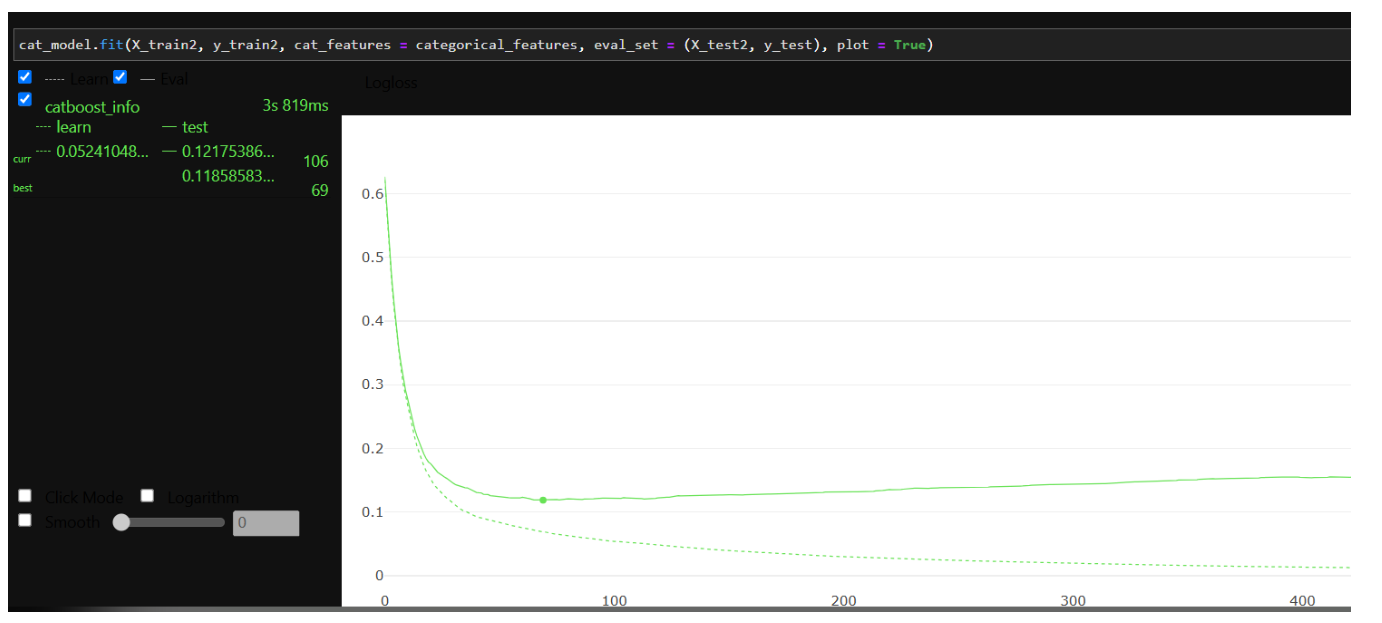

In [38]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [39]:
eval_metric(cat_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[40  4]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.93      0.93      0.93        56

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100


Train_Set
[[455   1]
 [ 10 434]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       456
           1       1.00      0.98      0.99       444

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



In [41]:
# Creating the CatBoost model
cat_model = CatBoostClassifier(n_estimators=500, random_state=42, verbose=0)

# Cross-validation
scores = cross_validate(
    cat_model,
    X_train2,
    y_train2,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    cv=5,
    return_train_score=True,
    n_jobs=-1,
    fit_params={'cat_features': categorical_features}  # Categorical properties for CatBoost are defined here
)

df_scores = pd.DataFrame(scores, index=range(1, 6))
print(df_scores.mean()[2:])

test_accuracy      0.963333
train_accuracy     0.989444
test_precision     0.970664
train_precision    0.996002
test_recall        0.954954
train_recall       0.982545
test_f1            0.962468
train_f1           0.989225
test_roc_auc       0.988491
train_roc_auc      0.999603
dtype: float64


## <font color='mediumorchid'> <b>GridSearchCV</b><font color='black'>

**CatBoost Hyperparameters**

**Model Structure and Learning Control**

* **boosting_type:**
  - **Description:** Specifies the type of boosting used. In CatBoost, this parameter is typically set to 'Ordered', and the ordered boosting feature, which is sensitive to the data order, is used.
  - **Default:** 'Plain'

* **iterations:**
  - **Description:** Defines the number of boosting iterations (number of trees) the model will perform.
  - **Default:** 1000
  - **Effect:** More iterations generally lead to better results, but they can increase training time and raise the risk of overfitting.

* **depth:**
  - **Description:** The maximum depth of the decision trees.
  - **Default:** 6
  - **Effect:** Deeper trees can learn more complex relationships but increase the risk of overfitting.

* **learning_rate:**
  - **Description:** Determines the model's weight per iteration.
  - **Default:** Auto (typically 0.03)
  - **Effect:** Smaller values provide better generalization but require more iterations.

* **l2_leaf_reg:**
  - **Description:** L2 regularization coefficient for leaf nodes.
  - **Default:** 3.0
  - **Effect:** Higher values reduce overfitting but may limit learning flexibility.

---

**Data and Feature Subsampling**

* **bagging_temperature:**
  - **Description:** The temperature parameter used for random sampling.
  - **Default:** 1.0
  - **Effect:** Lower values increase model stability, while higher values increase variability.

* **subsample:**
  - **Description:** The proportion of samples to be used in each iteration.
  - **Default:** 1.0
  - **Effect:** Lower values can help prevent overfitting.

* **colsample_bylevel:**
  - **Description:** The proportion of features to be used for each tree level.
  - **Default:** 1.0
  - **Effect:** Lower values can reduce the model's variance.

* **border_count:**
  - **Description:** The number of bins to be used for numerical feature binarization.
  - **Default:** 254
  - **Effect:** Higher values allow more precise processing of numerical features but can increase training time.

---

**Objective Function and Regularization**

* **loss_function:**
  - **Description:** The objective function used in model optimization.
  - **Default:** 'Logloss' (classification) or 'RMSE' (regression)
  - **Effect:** Choosing the right loss function can improve the model's accuracy.

* **eval_metric:**
  - **Description:** The metric used to evaluate model performance.
  - **Default:** 'Logloss'
  - **Effect:** Selecting an appropriate metric for different problems is important.

* **reg_lambda:**
  - **Description:** L2 regularization term (Ridge regularization).
  - **Default:** 3.0
  - **Effect:** Higher values make the model less complex.

* **random_strength:**
  - **Description:** The strength of randomness used during tree construction.
  - **Default:** 1.0
  - **Effect:** Higher values can help prevent overfitting.

---

**Categorical Data Handling**

* **cat_features:**
  - **Description:** List of categorical features.
  - **Default:** Must be specified.
  - **Effect:** CatBoost automatically handles categorical features and improves model performance.

* **one_hot_max_size:**
  - **Description:** Maximum number of unique values for one-hot encoding.
  - **Default:** 2
  - **Effect:** Higher values allow more detailed processing of categorical features.

---

**Performance Optimization**

* **task_type:**
  - **Description:** Specifies whether the model will run on CPU or GPU.
  - **Default:** 'CPU'
  - **Effect:** Using GPU can significantly reduce training time.

* **devices:**
  - **Description:** Specifies which devices to use for GPU computation.
  - **Default:** None

* **logging_level:**
  - **Description:** The level of detail in the logs during training.
  - **Default:** 'Verbose'
  - **Effect:** Lower levels provide less detail.

---

**Training Process Control**

* **early_stopping_rounds:**
  - **Description:** Number of iterations with no improvement after which training will stop.
  - **Default:** None
  - **Effect:** Can shorten training time and prevent overfitting.

* **iterations_limit:**
  - **Description:** Limits the maximum number of iterations.
  - **Default:** None

* **verbose:**
  - **Description:** The level of output during the training process.
  - **Default:** True

---

**Hyperparameter Summary Table**

| **Parameter**          | **Description**                                      | **Default**     |
|------------------------|------------------------------------------------------|-----------------|
| **boosting_type**       | Type of boosting                                    | 'Plain'        |
| **iterations**          | Number of iterations                                | 1000            |
| **learning_rate**       | Learning rate                                       | Auto            |
| **depth**               | Depth of the trees                                  | 6               |
| **l2_leaf_reg**         | L2 regularization coefficient                       | 3.0             |
| **loss_function**       | Loss function used for optimization                 | 'Logloss'       |
| **cat_features**        | List of categorical features                        | Must be specified|
| **task_type**           | Device type (CPU or GPU)                            | 'CPU'           |
| **early_stopping_rounds**| Early stopping criteria                            | None            |
| **subsample**           | Subsampling rate                                   | 1.0             |
| **border_count**        | Number of bins for numerical feature binarization    | 254             |


In [ ]:
# !pip install tensorflow

In [43]:
import tensorflow as tf

# To check if there is a CUDA supported GPU
print("CUDA Supported GPU Available: ", tf.config.list_physical_devices('GPU'))

CUDA Supported GPU Available:  []


In [44]:
param_grid = {
    'learning_rate': [0.05, 0.1],                # Learning rate (narrower range)
    'iterations': [200, 500],                    # Number of trees (narrower range)
    'depth': [4, 6],                             # Maximum tree depth (narrower range)
    'l2_leaf_reg': [1, 3],                       # L2 regularization (narrower range)
    'bagging_temperature': [0.0, 1.0],           # Bagging temperature (narrower range)
    'grow_policy': ['Depthwise', 'Lossguide'],   # Tree growth policy (fixed)            
    'early_stopping_rounds': [50]                # Early stopping rounds (added)
}

In [45]:
cat_model = CatBoostClassifier(random_state=42, verbose=0)

In [46]:
cat_grid = GridSearchCV(estimator=cat_model,
                        param_grid=param_grid,
                        cv=3,
                        scoring='f1',
                        n_jobs=-1,
                        return_train_score=True
                        ).fit(X_train2, y_train2, cat_features= categorical_features)

In [47]:
cat_grid.best_params_

{'bagging_temperature': 0.0,
 'depth': 6,
 'early_stopping_rounds': 50,
 'grow_policy': 'Depthwise',
 'iterations': 500,
 'l2_leaf_reg': 3,
 'learning_rate': 0.1}

In [48]:
cat_grid.best_estimator_

In [49]:
cat_grid.best_score_

0.963598615916955

## <font color='mediumorchid'> <b>Model Performance</b><font color='black'>

In [51]:
def eval_metric2(model, X_train, y_train, X_test, y_test, cat_features):
    """
    Prints confusion matrix and classification report for the CatBoost model on the training and test sets.
    
    Args:
        model: Trained CatBoost model.
        X_train: Training dataset.
        y_train: Training labels.
        X_test: Test dataset.
        y_test: Test labels.
        cat_features: Names of categorical features.
    """
    
    # Training predictions
    train_pool = Pool(X_train, y_train, cat_features=cat_features)
    y_train_pred = model.predict(train_pool)
    
    # Test predictions
    test_pool = Pool(X_test, y_test, cat_features=cat_features)
    y_pred = model.predict(test_pool)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [52]:
eval_metric2(cat_grid, X_train2, y_train2, X_test2, y_test2, categorical_features)

Test_Set
[[40  4]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        44
           1       0.93      0.93      0.93        56

    accuracy                           0.92       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.92      0.92      0.92       100


Train_Set
[[456   0]
 [  1 443]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       456
           1       1.00      1.00      1.00       444

    accuracy                           1.00       900
   macro avg       1.00      1.00      1.00       900
weighted avg       1.00      1.00      1.00       900



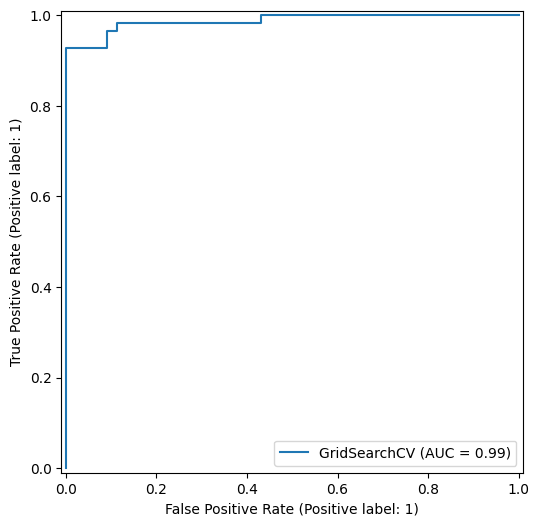

In [53]:
RocCurveDisplay.from_estimator(cat_grid, test_pool, y_test2);

In [54]:
y_pred = cat_grid.predict(test_pool)

# process of assigning metrics to variables for comparison
cat_f1 = f1_score(y_test2, y_pred)
cat_recall = recall_score(y_test2, y_pred)
cat_auc = roc_auc_score(y_test2, y_pred)

## <font color='mediumorchid'> <b>Feature Importance</b><font color='black'>

In [56]:
model = CatBoostClassifier(bagging_temperature= 0.0, depth= 6, early_stopping_rounds= 50, grow_policy= "Lossguide", iterations= 200, l2_leaf_reg= 1, learning_rate= 0.05, random_state=42, verbose=0)
model.fit(train_pool)
model.feature_importances_

feats = pd.DataFrame(index=X_train2.columns, data=model.feature_importances_, columns=['cat_importance'])
cat_imp_feats = feats.sort_values("cat_importance", ascending=False)
cat_imp_feats

,cat_importance
Daily Internet Usage,53.974657
Daily Time Spent on Site,27.743548
Area Income,7.876646
Age,5.847434
Country,3.282701
Male,1.077856
City,0.197158


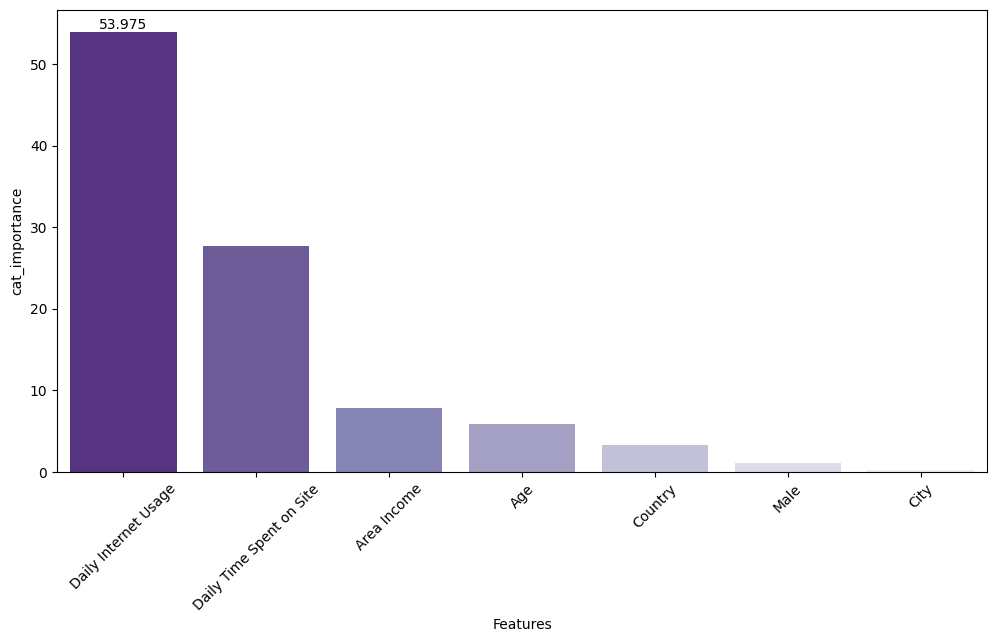

In [78]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=cat_imp_feats, x=cat_imp_feats.index, y='cat_importance', palette= 'Purples_r')
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.xticks(rotation=45)
plt.xlabel("Features");

<p style="background-color:mediumpurple;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:60px 20px;"><b>THANK YOU!</b></p>